# Notes from Daniel Voigt Godoy's Pytorch Book

"Deep Learning with PyTorch" Step by Step Guide
published around 2021

his source code:

https://github.com/dvgodoy/PyTorchStepByStep



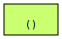

In [3]:
import os
os.environ["PATH"]+= os.pathsep + "/ccs/proj/gen150/fwang2/deep-py38/bin"

import torch
import torch.nn as nn
import tensorboard as tb

# setup
# conda install graphviz
# pip install torchviz
#
# verify torchviz


from torchviz import make_dot
v = torch.tensor(1.0, requires_grad=True)
make_dot(v)

## Ch00 Visualizing Gradient Descent


Github code: https://github.com/dvgodoy/PyTorchStepByStep/blob/master/Chapter01.ipynb


This book uses: 

$$ y = b + wx + \epsilon $$

that is, feature ($x$) to predict a label $y$. The **parameter** $b$ is the bias, which tell us the expected value of $y$ when $x=0$; **parameter** $w$ or the weights tell us how much $y$ increaes on average, if we increase $x$ by one unit. The last term is there to account for inherent **noise**, that is the error we can't get rid of.


### Prep the synthetic data

1) generate N number of random values (0,1)
2) add each with some noise from "standard normal"
3) split train and val by 80% and 20% (indices)


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [5]:
# synthetic data generation
true_b = 1
true_w = 2
N = 100
np.random.seed(42)
x = np.random.rand(N, 1) # random value between 0 and 1

epsilon = (0.1 * np.random.randn(N,1)) # from normal distribution

y = true_b + true_w * x + epsilon


In [6]:

# shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# use first 80 random indices for train
train_idx = idx[:int(N * 0.8)]

# use the remaining indices for validation

val_idx = idx[int(N*0.8):]

# generates train and validataion sets

x_train , y_train = x[train_idx], y[train_idx]
x_val , y_val = x[val_idx], y[val_idx]


In [8]:
import matplotlib.pyplot as plt
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <AxesSubplot:title={'center':'Generated Data - Validation'}, xlabel='x', ylabel='y'>],
       dtype=object))

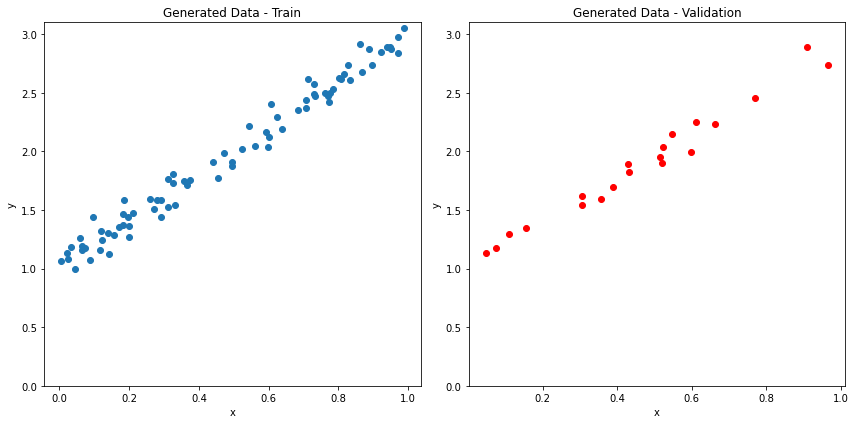

In [7]:
figure1(x_train,y_train, x_val, y_val)

### Step 0: random initialization

In [9]:

# step 0 random init
# initialize the parameters "b" and "w" randomly

np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)
print(b,w)



[0.49671415] [-0.1382643]


### step 1: compute model predictions

forward pass - compute the model predition using current value of w anb b.

In [10]:
yhat = b + w * x_train

### step 2: compute the loss

for a regression program, the loss is given by Mean Squared Error (MSE), that is, the average of all squared erros.

in the code below, we are using all data points of the training set to compute the loss, so $n = N = 80$, so this is batch gradient descent.


In [12]:
error = (yhat - y_train)

# we now compute MSE

loss = (error **2).mean()

print(loss)

2.7421577700550976


### step 3: Compute the gradient

a **gradient** is a **partial derivative**. It tells you how much a **given quantity changes**, when you slightly vary the **other quantity**. Here the **given quantity** is usually the loss, the **other quanity** is some parameter under consideration, in this case, that is $b$ and $w$.

In [13]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### step 4: update parameters

in this step, we use gradient to update the parameters. we use negative sign of the gradient for the update.



In [14]:
lr = 0.1 # learning rate, "eta" in Greek letter
print(b, w)

# update parameter

b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


### step 5: repeat

we now go back to step 1 and restart the process


### Definition of Epoch

A epoch is complete whenever every point in the training set (N) has already been use in all steps: forward pass, computing the loss, computing the gradient, and update the parameters.

The number of **update** varies:

* for batch ($n=N$), one epoch is the same as **one update**
* for stochastic ($n=1$), one epoch means $N$ updates
* for mini-batch (of size $n$), one epoch has $\frac{N}{n}$ updates



### Loss vs. Error

The **error** is the difference between the **actual value** and **predicted value** computed for a single data point. For for $i-th$ data point:

$$\text{error}_i = \hat{y_i} - y_i$$

The **losss**, on the other hand, it some sort of **aggregation** of errors for a set of data points.

* If we use **all points** in the training dataset, $n=N$ to compute the loss, we are performing a **batch gradient descent**.

* If we use a **single point** ($n=1$) each time, it will be stochastic gradient descent.

* Anything else in between 1 and $N$, that is **mini-batch gradient descent**.




### Loss Metrics for Regression: Mean Squared Error (MSE)


$$ MSE = \frac{1}{n} \sum_{i=1}^{n} {error_i}^2 $$

# Chapter 1: Pytorch 

* A **scalar** has zero dimensions
* A **vector** has 1 dimension
* A **matrix** has 2 dimensions
* A **tensor** has 3 or more dimensions

In [2]:
import torch
scalar = torch.tensor(3.14)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2,3), dtype=torch.float)
tensor = torch.randn((2,3,4), dtype=torch.float)
print(tensor)

tensor([[[ 0.5994, -0.4839,  2.6529, -0.4418],
         [-0.5988,  1.7301,  0.7432, -0.5117],
         [-0.0465,  0.9899, -0.7225,  0.5121]],

        [[-0.7051, -0.0245, -1.7726,  1.6511],
         [-0.5426,  0.4664, -0.2768, -0.5843],
         [-1.3292, -0.1424,  1.0662,  0.1251]]])


In [4]:
print(scalar.size(), scalar.shape)
print(tensor.size(), tensor.shape)

torch.Size([]) torch.Size([])
torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


In [6]:
# get a different view

same_matrix = matrix.view(1,6)
print(matrix)
print(same_matrix)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 1., 1., 1., 1., 1.]])
